In [ ]:
#Jawad_Hassan_2230_0035_Assignment_4

In [3]:
#task1
import pandas as pd
data = {
    "EmployeeID": [1,2,3,4,5,6,7,8,9,10],
    "Age": [25,30,45,24,50,30,27,34,60,55],
    "Gender": ["M","F","F","M","M","M","F","F","M","M"],
    "Department": ["IT","HR","Finance","IT","IT","HR","Management","Finance","HR","Management"],
    "Education": ["Master","Master","Bachelor","Bachelor","Bachelor","Master","Phd","Master","Bachelor","Phd"],
    "Experience": [2,3,4,2,10,6,2,8,5,3],
    "Salary": [45000,60000,70000,60000,110000,120000,210000,150000,105000,220000]
}

df = pd.DataFrame(data)
print(df.head())
print(df.tail())
print(df.shape)
print(df.columns)
print(df.dtypes)
num_feat = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:", list(num_feat))
cat_feat = df.select_dtypes(include=['object']).columns
print("Categorical Features:", list(cat_feat))
#structure
"""The dataset contains employee-related information.

Each row represents one employee.

Each column represents a specific attribute of an employee."""

   EmployeeID  Age Gender Department Education  Experience  Salary
0           1   25      M         IT    Master           2   45000
1           2   30      F         HR    Master           3   60000
2           3   45      F    Finance  Bachelor           4   70000
3           4   24      M         IT  Bachelor           2   60000
4           5   50      M         IT  Bachelor          10  110000
   EmployeeID  Age Gender  Department Education  Experience  Salary
5           6   30      M          HR    Master           6  120000
6           7   27      F  Management       Phd           2  210000
7           8   34      F     Finance    Master           8  150000
8           9   60      M          HR  Bachelor           5  105000
9          10   55      M  Management       Phd           3  220000
(10, 7)
Index(['EmployeeID', 'Age', 'Gender', 'Department', 'Education', 'Experience',
       'Salary'],
      dtype='object')
EmployeeID     int64
Age            int64
Gender        object


'The dataset contains employee-related information.\n\nEach row represents one employee.\n\nEach column represents a specific attribute of an employee.'

In [8]:
#task2
# Summary statistics
print(df.describe())
print(df["Salary"].describe())
# Average experience per department
print(df.groupby("Department")["Experience"].mean())
# Minimum and maximum salary
print("Minimum Salary:", df["Salary"].min())
print("Maximum Salary:", df["Salary"].max())

# Employees with extreme salaries
print(df[df["Salary"] == df["Salary"].max()])
print(df[df["Salary"] == df["Salary"].min()])


       EmployeeID        Age  Experience         Salary
count    10.00000  10.000000   10.000000      10.000000
mean      5.50000  38.000000    4.500000  115000.000000
std       3.02765  13.316656    2.758824   61824.123303
min       1.00000  24.000000    2.000000   45000.000000
25%       3.25000  27.750000    2.250000   62500.000000
50%       5.50000  32.000000    3.500000  107500.000000
75%       7.75000  48.750000    5.750000  142500.000000
max      10.00000  60.000000   10.000000  220000.000000
count        10.000000
mean     115000.000000
std       61824.123303
min       45000.000000
25%       62500.000000
50%      107500.000000
75%      142500.000000
max      220000.000000
Name: Salary, dtype: float64
Department
Finance       6.000000
HR            4.666667
IT            4.666667
Management    2.500000
Name: Experience, dtype: float64
Minimum Salary: 45000
Maximum Salary: 220000
   EmployeeID  Age Gender  Department Education  Experience  Salary
9          10   55      M  Managem

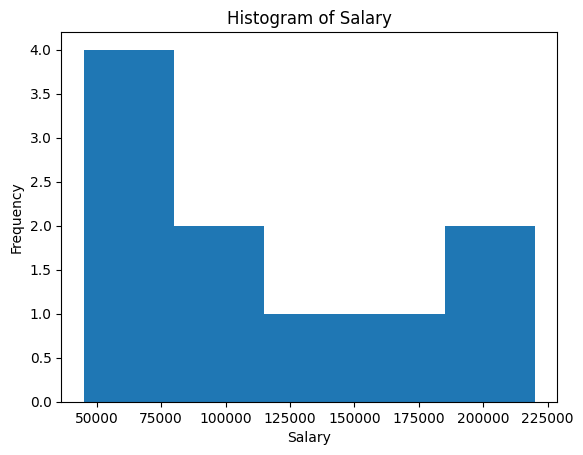

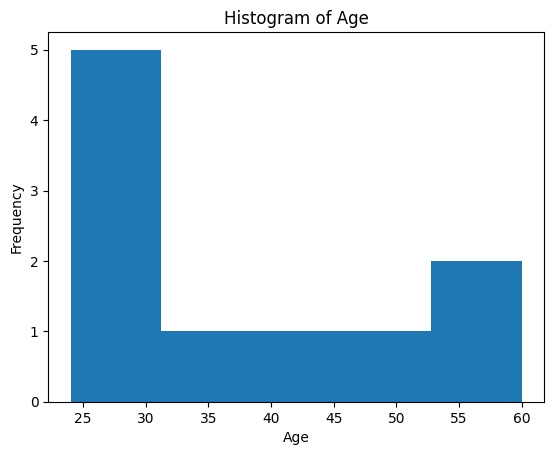

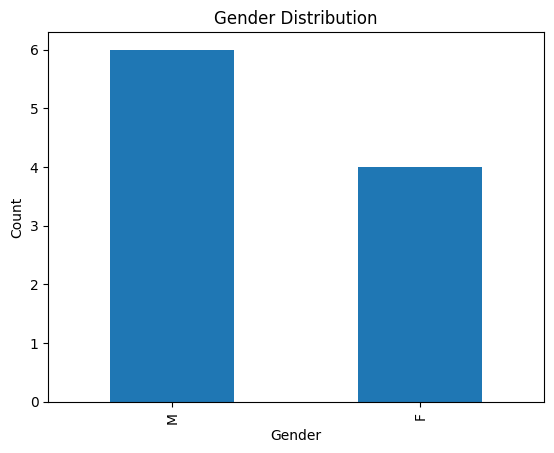

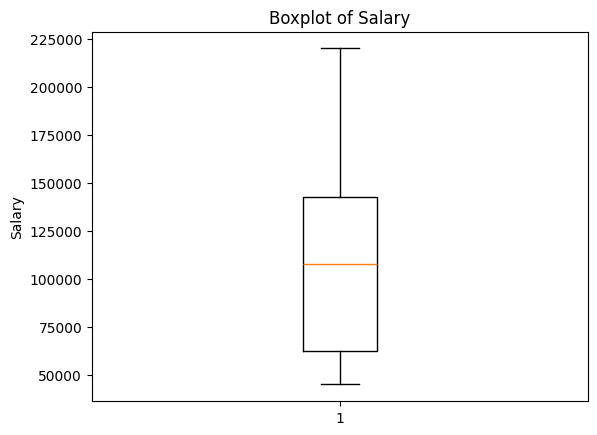

Salary Skewness: 0.7581991865866764
Age Skewness: 0.6041391051025736


In [14]:
#task3
import matplotlib.pyplot as plt
plt.figure()
plt.hist(df["Salary"], bins=5)
plt.title("Histogram of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(df["Age"], bins=5)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure()
df["Gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.boxplot(df["Salary"])
plt.title("Boxplot of Salary")
plt.ylabel("Salary")
plt.show()

print("Salary Skewness:", df["Salary"].skew())
print("Age Skewness:", df["Age"].skew())

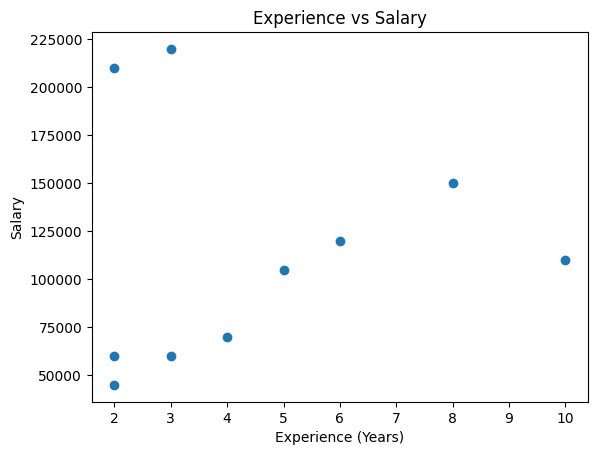

<Figure size 640x480 with 0 Axes>

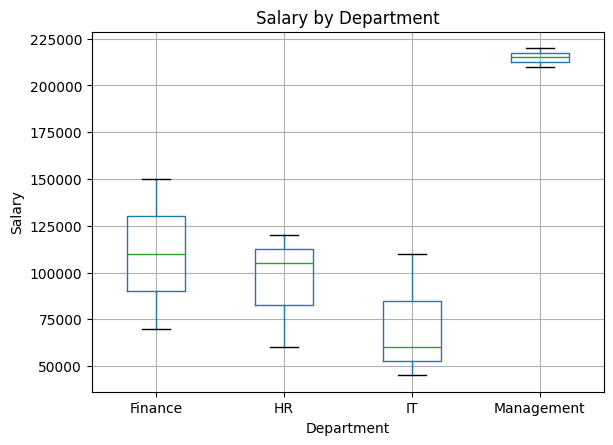

,Salary
Education,
Bachelor,86250.0
Master,93750.0
Phd,215000.0


In [17]:
#task4
plt.figure()
plt.scatter(df["Experience"], df["Salary"])
plt.title("Experience vs Salary")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.show()

plt.figure()
df.boxplot(column="Salary", by="Department")
plt.title("Salary by Department")
plt.suptitle("")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.show()

df.groupby("Education")["Salary"].mean()

            EmployeeID       Age  Experience    Salary
EmployeeID    1.000000  0.570462    0.259395  0.816200
Age           0.570462  1.000000    0.390147  0.281391
Experience    0.259395  0.390147    1.000000  0.078173
Salary        0.816200  0.281391    0.078173  1.000000


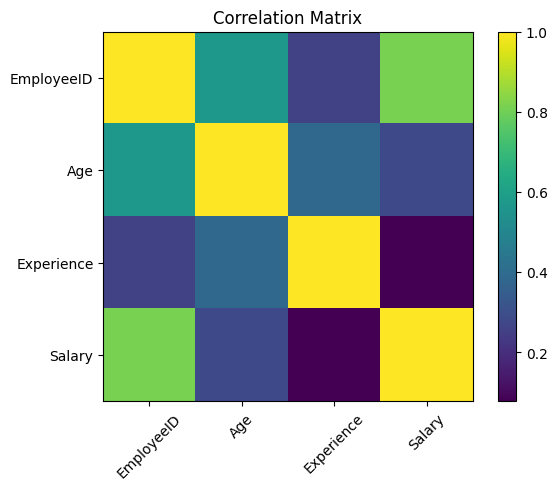

In [20]:
#task5
# Select numerical columns only
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr_matrix = numerical_df.corr()
print(corr_matrix)

plt.figure()
plt.imshow(corr_matrix, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix")
plt.show()

"""The dataset shows no strong meaningful numerical correlation with Salary; Education and Department are likely stronger predictors than Age or Experience."""